In [1]:
import mysql.connector 
from mysql.connector import Error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Establish MySQL Server Connection

try:
    connection = mysql.connector.connect(
        host = 'localhost',
        database = 'Project_IPLSchema', 
        user = 'root',
        password = 'software@123',  
        auth_plugin = 'mysql_native_password'
    )
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)
    
except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_iplschema',)


In [7]:
#1 - Social media Influence of different teams
## The media influence is directly proportional to the marchandise sales and hence profit of team (improved budgets to pick players)

if connection.is_connected():
    sql_select_fan_engg_exp = """ select f.franchise_name, sum(fe.social_media_followers) as followers
                                from fan_engagement fe, franchise f
                                where f.franchise_id = fe.franchise_id
                                group by fe.franchise_id; """

res1_df = pd.read_sql(sql_select_fan_engg_exp,connection)
res1_df = res1_df.sort_values(by='followers', ascending=False)
res1_df

/var/folders/rk/mcqydyks29jdvnxvwy50b8qc0000gn/T/ipykernel_3016/3794560341.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res1_df = pd.read_sql(sql_select_fan_engg_exp,connection)


,franchise_name,followers
8,Royal Challengers Bangalore,1.425819e+09
1,Rajasthan Royals,1.291523e+09
5,Lucknow Super Giants,9.669780e+08
3,Chennai Super Kings,8.902477e+08
4,Sunrisers Hyderabad,6.815387e+08
9,Punjab Kings,5.994079e+08
0,Mumbai Indians,5.872030e+08
6,Delhi Capitals,4.652085e+08
7,Gujarat titans,4.048365e+08
2,Kolkata Knight Riders,3.540748e+08


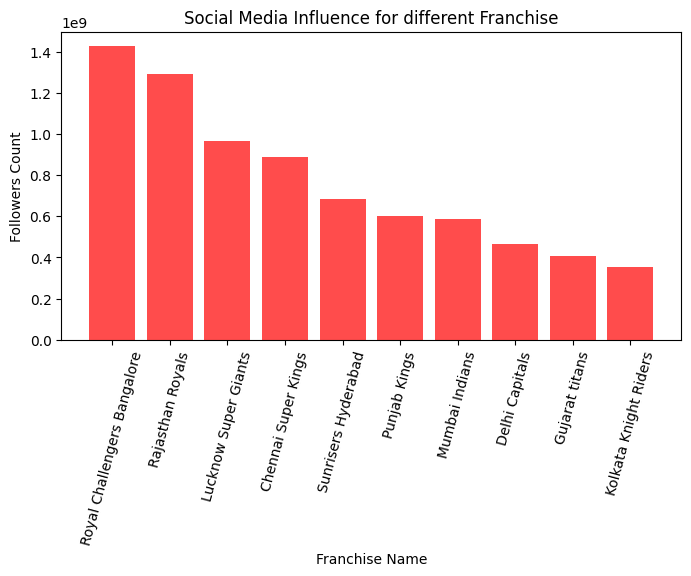

In [8]:
#Visualization of social media influence for different teams

plt.figure(figsize=(8, 4))
plt.bar(res1_df['franchise_name'], res1_df['followers'], color='red', alpha = 0.7)
plt.xlabel('Franchise Name')
plt.ylabel('Followers Count')
plt.xticks(res1_df['franchise_name'], rotation = 75)
plt.title('Social Media Influence for different Franchise')
plt.show()

Inference: 
1. The bar chart provides  visualization of the followers count for each franchise.
2. The franchises are labeled on the x-axis, and their corresponding followers count is represented by the height of the bars.
3. From the graph it is clear that Royal Challengers Bangalore have the highest number of fan followers, whereas Kolkata Knight Riders have the least.

In [13]:
#2 - Distribution of Players across Number of Seasons
## Distrubution of the no. of seasons played by each player - Experience of the player with IPL and hence dealing the with the game dynamics

if connection.is_connected():
    sql_select_player_season = """ select player_id, count(distinct auction_id) as no_of_seasons
                                from bid
                                group by player_id; """

res2_df = pd.read_sql(sql_select_player_season,connection)
res2_df

/var/folders/rk/mcqydyks29jdvnxvwy50b8qc0000gn/T/ipykernel_3016/2299765759.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res2_df = pd.read_sql(sql_select_player_season,connection)


,player_id,no_of_seasons
0,1,2
1,2,3
2,3,1
3,4,2
4,5,1
...,...,...
216,244,3
217,246,1
218,247,1
219,248,3


In [14]:
value_counts = res2_df['no_of_seasons'].value_counts().sort_values(ascending=False)

print(value_counts)

no_of_seasons
2    85
1    82
3    38
4    10
5     4
6     2
Name: count, dtype: int64


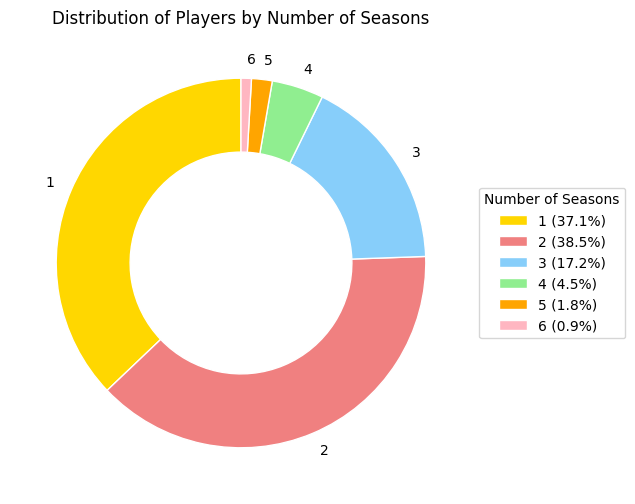

In [15]:
## Visualize the distribution of players and the number the number of seasons played by each

# Assuming value_counts is a pandas Series with index and values representing counts
value_counts = res2_df['no_of_seasons'].value_counts()

# Sort the value_counts by index (number of seasons)
value_counts = value_counts.sort_index()

# Define six different colors
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink']

# Create a larger figure with a stretched horizontal aspect ratio
plt.figure(figsize=(8, 6))

# Create a pie chart without percentages
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='', startangle=90, colors=colors,
                                    wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.85)

# Combine legend labels and percentages rounded to 1 decimal place
legend_labels = [f'{label} ({round(value, 1)}%)' for label, value in zip(value_counts.index, value_counts / value_counts.sum() * 100)]

# Add a legend outside the pie chart with adjusted bbox_to_anchor
plt.legend(patches, legend_labels, title='Number of Seasons', bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Distribution of Players by Number of Seasons')

plt.show()

Infernece:
1. Each segment of the pie chart represents the distinct number of seasons in which players have participated.
2. The chart's distribution implies that the dataset primarily consists of players with a moderate level of participation (1 to 2 seasons).
3. Participation drops off for players with more extended involvement (3 or more seasons), indicating a potential trend of player turnover or fewer players with extended careers.
4. Only 0.9% of the players have played all the seasons

In [19]:
#3 - Total Amount Spent in IPL Auctions Over the Years
## The budget trends across the years

if (connection.is_connected()):
    sql_select_budget = """ SELECT year, total_amount 
                                FROM auction 
                                ORDER BY year; """

res3_df = pd.read_sql(sql_select_budget, connection)
res3_df

/var/folders/rk/mcqydyks29jdvnxvwy50b8qc0000gn/T/ipykernel_3016/4210238239.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res3_df = pd.read_sql(sql_select_budget, connection)


,year,total_amount
0,2018,1.067572e+09
1,2019,1.898573e+09
2,2020,1.829095e+09
3,2021,1.042303e+09
4,2022,1.139097e+09
5,2023,1.280555e+09


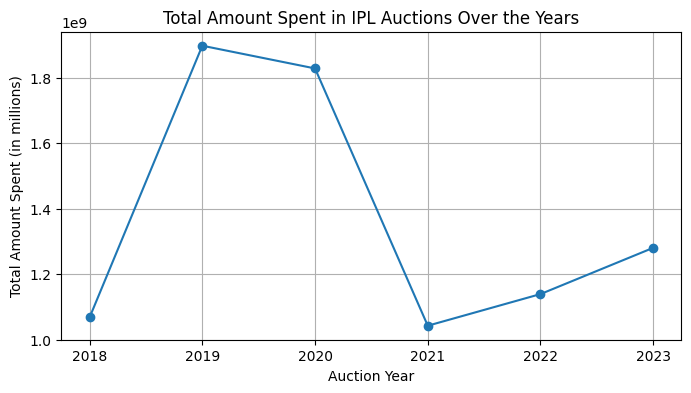

In [20]:
#Visualization of Total Amount Spent in IPL Auctions Over the Years

plt.figure(figsize=(8, 4))
plt.plot(res3_df['year'], res3_df['total_amount'], marker='o', linestyle='-')
plt.xlabel('Auction Year')
plt.ylabel('Total Amount Spent (in millions)')
plt.title('Total Amount Spent in IPL Auctions Over the Years')
plt.grid(True)
plt.show()

Inference:
1. The line chart effectively captures the dynamic nature of financial investments in IPL auctions, showcasing both the overall growth and the variations in spending patterns across different years
2. The highest amount spent is observed in the year 2019, suggesting a peak in financial commitment during that particular auction season
3. Factors such as changes in sponsorship deals, broadcasting rights, fan engagement activities or other economic conditions may impact the total amount spent, contributing to the observed fluctuations.
4. The chart provides a valuable tool for stakeholders to analyze financial trends, assess the competitiveness of auctions, and make informed decisions for subsequent IPL seasons.

In [22]:
#4 - Distribution of players between batsman, bowler in all_rounder
## Visualization shws the distribution of players as batsman, bowler and players who are specialized in both

if connection.is_connected():
            sql_select_query= """ SELECT player_id, batsman_id, bowler_id
                                FROM all_rounder; """
# Execute the query and fetch the data into a DataFrame
res4_df = pd.read_sql_query(sql_select_query, connection)
res4_df

/var/folders/rk/mcqydyks29jdvnxvwy50b8qc0000gn/T/ipykernel_3016/2119468540.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res4_df = pd.read_sql_query(sql_select_query, connection)


,player_id,batsman_id,bowler_id
0,1,1.0,1.0
1,2,2.0,NaN
2,3,3.0,2.0
3,4,NaN,3.0
4,5,4.0,NaN
...,...,...,...
245,246,NaN,166.0
246,247,149.0,167.0
247,248,150.0,NaN
248,249,NaN,168.0


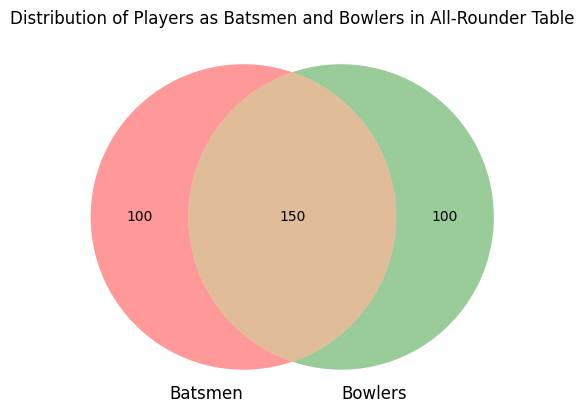

In [23]:
# Visualization of distribution of players between batsman, bowler in all_rounder

from matplotlib_venn import venn2
set1 = set(res4_df['batsman_id'])
set2 = set(res4_df['bowler_id'])

venn2([set1, set2], set_labels=('Batsmen', 'Bowlers'))
plt.title('Distribution of Players as Batsmen and Bowlers in All-Rounder Table')
plt.show()

Inference:
1. The Venn diagram  represents the distribution of players categorized as batsmen and bowlers within the "All-Rounder" table
2. The overlapping region in the Venn diagram represents players who are both batsmen and bowlers. These individuals are classified as "All-Rounders" since they contribute significantly to both batting and bowling aspects of the game.
3. The left circle represents the set of players categorized solely as batsmen. They are primarily known for their batting performances 
4. The right circle represents the set of players categorized solely as bowlers. These players are specialized in bowling and may not contribute significantly to batting.

In [27]:
#5 - Batsman who have scored maximum number of 50's and 100's
##Visualizing the top players who have scored max no. of 50's and 100's

if connection.is_connected():
    sql_select_batsman = """ SELECT p.player_name, b.no_of_50s, b.no_of_100s
                FROM batsman b
                JOIN player p ON b.player_id = p.player_id
                ORDER BY (b.no_of_50s + b.no_of_100s) DESC
                LIMIT 10; """

res5_df = pd.read_sql(sql_select_batsman, connection)
res5_df

/var/folders/rk/mcqydyks29jdvnxvwy50b8qc0000gn/T/ipykernel_3016/3883520357.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res5_df = pd.read_sql(sql_select_batsman, connection)


,player_name,no_of_50s,no_of_100s
0,Daniel Jefferson,10,5
1,James James,9,5
2,Todd Green,9,5
3,Christian Stevens,10,4
4,Ivan Hammond,10,4
5,Tyler Calderon,10,4
6,Matthew Castillo,9,4
7,Brent Young,8,5
8,Jonathan Bailey,8,5
9,Douglas Chavez,10,3


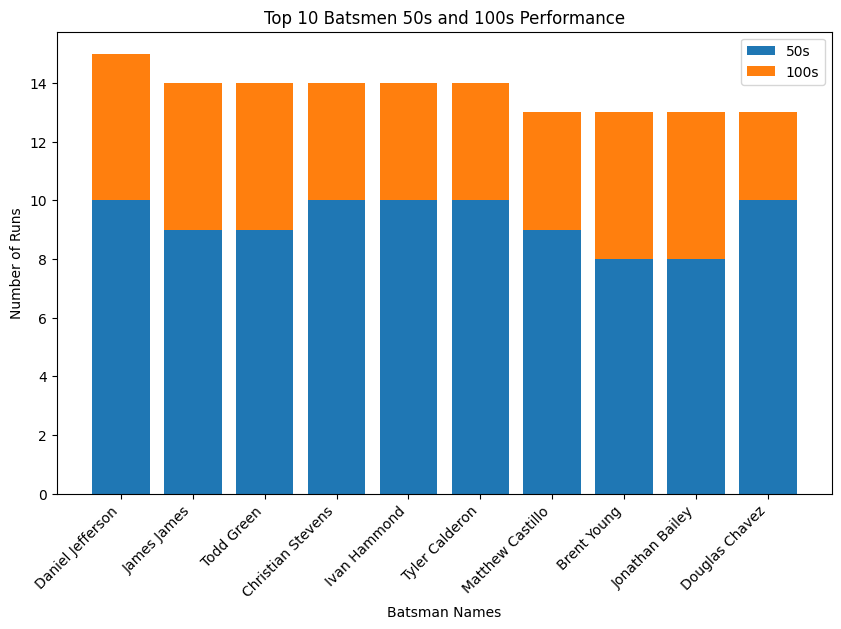

In [28]:
# Plotting the stacked bar chart

plt.figure(figsize=(10, 6))
plt.bar(res5_df['player_name'], res5_df['no_of_50s'], label='50s')
plt.bar(res5_df['player_name'], res5_df['no_of_100s'], bottom=res5_df['no_of_50s'], label='100s')
plt.xlabel('Batsman Names')
plt.ylabel('Number of Runs')
plt.title('Top 10 Batsmen 50s and 100s Performance')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

Inference:
1. The stacked bar chart visualizes the performance of the top 10 batsmen in terms of the number of 50s and 100s
2. The bar in the chart is divided into two segments: the lower segment represents the number of 50s, and the upper segment represents the number of 100s
3. The height of the entire bar signifies the total number of runs contributed by each batsman through both half-centuries and centuries
4. Batsmen with a higher proportion of the upper segment (100s) may be considered as more consistent in converting starts into big scores

In [29]:
if (connection.is_connected()):
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

MySQL connection is closed
